# ANALISI DEI FLUSSI MIGRATORI IN ITALIA
* * *

A tutti è noto il fenomeno della migrazione: le persone sono spinte per vari motivi a spostarsi tra Paesi, come ad esempio per lavoro, per amore o per necessità a causa di contesti di guerra, problemi climatici o politici. Il fenomeno di carattere sociale è studiato da numerosi sociologi e politologi; ne risulta che è molto controverso e sostenuto e/o criticato (a seconda dei punti di vista); in Italia è un argomento che suscita non poche polemiche, soprattutto a livello politico.

**OBBIETTIVO**: la seguente analisi ha come obbiettivo quello di evidenziare la presenza di fenomeni migratori verso il nostro Paese mettendone in luce i *numeri*, i *motivi* e le *conseguenze* che possono derivarne.

**I DATI**: la fonte dei dati è l'ISTAT, che si occupa, tramite una sezione dedicata (Immigrati.Stat), di raccogliere numeri a proposito del fenomeno nelle sue varie sfaccettature.

+ **Importo le librerie**

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt

> ## ANALISI
***

In questa parte andremo ad **analizzare** i dati forniti dall'ISTAT mettendo in evidenza i punti salienti con dei brevi commenti e dei grafici. Partiremo dal numero delle persone straniere residenti in Italia, i motivi per i quali si trovano nel nostro Paese, i tassi di occupazione e disoccupazione, possibili aspetti positivi e negativi e le loro condizioni sociali. 

+ **PUNTO 1: NUMERO MIGRANTI RESIDENTI IN ITALIA nei recenti anni**

**QUANTI SONO? SONO IN AUMENTO?**

Per prima cosa importo il dataframe della popolazione straniera residente in italia suddivisa per anni (2017, 2018, 2019), sesso e regione. Si utilizzano gli ultimi tre anni resi disponibili dall'ISTAT per semplicità e come punto di riferimento.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [2]:
residenti_totale = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/stranieri_residenti.csv", usecols=['Territorio', 'Tipo di indicatore demografico', 'Sesso', 'Seleziona periodo', 'Value'])
residenti_totale.isnull().any() #non sono presenti valori nulli

Territorio                        False
Tipo di indicatore demografico    False
Sesso                             False
Seleziona periodo                 False
Value                             False
dtype: bool

Visualizzo la tabella dei residenti rinominando le colonne per semplicità.

In [162]:
residenti_totale = residenti_totale.rename(columns= {'Tipo di indicatore demografico' : 'index', 'Seleziona periodo' : 'periodo', 'Value':'valore'})
residenti_totale.head()

,Territorio,index,Sesso,periodo,valore
0,Italia,popolazione straniera al 1° gennaio,maschi,2017,2404129
1,Italia,popolazione straniera al 1° gennaio,maschi,2018,2471722
2,Italia,popolazione straniera al 1° gennaio,maschi,2019,2540471
3,Italia,nati vivi stranieri,maschi,2017,34883
4,Italia,nati vivi stranieri,maschi,2018,33671


Successivamente seleziono le righe contentente il numero totale di popolazione residente al 31 dicembre e creo un dataframe per ogni anno.

In [4]:
residenti = residenti_totale.loc[(residenti_totale['index']== 'popolazione straniera al 31 dicembre')]
residenti = residenti.loc[(residenti['Territorio'] == 'Italia')]
residenti = residenti.loc[(residenti['Sesso']== 'totale')]
residenti

,Territorio,index,Sesso,periodo,valore
9657,Italia,popolazione straniera al 31 dicembre,totale,2017,5144440
9658,Italia,popolazione straniera al 31 dicembre,totale,2018,5255503
9659,Italia,popolazione straniera al 31 dicembre,totale,2019,5306548


In [5]:
residenti_2017 = residenti.iloc[0:1]
residenti_2017.head()

,Territorio,index,Sesso,periodo,valore
9657,Italia,popolazione straniera al 31 dicembre,totale,2017,5144440


In [6]:
residenti_2018 = residenti.iloc[1:-1]
residenti_2018.head()

,Territorio,index,Sesso,periodo,valore
9658,Italia,popolazione straniera al 31 dicembre,totale,2018,5255503


In [7]:
residenti_2019 = residenti.iloc[2:]
residenti_2019.head()

,Territorio,index,Sesso,periodo,valore
9659,Italia,popolazione straniera al 31 dicembre,totale,2019,5306548


#### Visioniamo la variazione di persone straniere residenti in Italia dal 2017 al 2019. Nel 2017 la popolazione straniera residente era pari a 5144440, nel 2018 era 5255503 e nel 2019 era 5306548. Il numero è in leggero aumento ma non in modo significativo.

Vogliamo visualizzare graficamente questo leggero aumento.

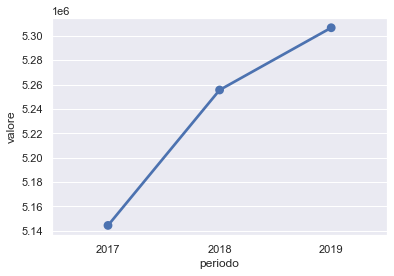

In [80]:
sns.pointplot(data=residenti, x='periodo', y='valore')

+ **PUNTO 2: PER QUALI MOTIVI LE PERSONE MIGRANO IN ITALIA (esempio 2018)**

L'ISTAT fornisce annualmente i dati sui permessi di soggiorno; viene utilizzato il dataframe del 2018 come esempio più recente. Il permesso di soggiorno è utile in quanto mi consente di estrapolare i motivi per i quali i richiedenti si trovano in Italia.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [9]:
permesso_sogg = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/permesso_soggiorno.csv", usecols=['Sesso','Principali Paesi di cittadinanza', 'Motivo del permesso', 'Seleziona periodo', 'Value'])
permesso_sogg.isnull().any() #non sono presenti valori nulli

Sesso                               False
Principali Paesi di cittadinanza    False
Motivo del permesso                 False
Seleziona periodo                   False
Value                               False
dtype: bool

Visualizzo il dataframe rinominando per comodità le variabili.

In [163]:
permesso_sogg = permesso_sogg.rename(columns= {'Principali Paesi di cittadinanza' : 'paese_cittadinanza', 'Motivo del permesso' : 'motivo_permesso', 'Value' : 'valore'})
permesso_sogg.head()

,Sesso,paese_cittadinanza,motivo_permesso,Seleziona periodo,valore
0,maschi,Albania,lavoro,2018,1384
1,maschi,Albania,famiglia,2018,6964
2,maschi,Albania,studio,2018,205
3,maschi,Albania,"asilo, richiesta asilo e motivi umanitari",2018,426
4,maschi,Albania,"residenza elettiva, religione, salute",2018,2570


Con la funzione pivot_table() creo una tabella coerente e ordinata nel quale visualizzo i valori per tipologia di permesso e suddivisi per provenienza geografica (seleziono solo i Paesi con un numero significativo).

In [14]:
permesso_sogg1 = permesso_sogg.loc[(permesso_sogg['paese_cittadinanza']=='Albania')| (permesso_sogg['paese_cittadinanza']=='Bangladesh')| (permesso_sogg['paese_cittadinanza']=='Cina')| (permesso_sogg['paese_cittadinanza']=='India')|(permesso_sogg['paese_cittadinanza']=='Marocco')| (permesso_sogg['paese_cittadinanza']=='Nigeria')| (permesso_sogg['paese_cittadinanza']=='Pakistan')]
permesso_sogg2 = permesso_sogg1.pivot_table(values='valore', index='paese_cittadinanza', columns='motivo_permesso')
permesso_sogg2

motivo_permesso,"asilo, richiesta asilo e motivi umanitari",famiglia,lavoro,"residenza elettiva, religione, salute",studio,tutte le voci
paese_cittadinanza,,,,,,
Albania,18.503704,329.503876,43.738854,103.892761,17.924370,484.056266
Bangladesh,184.975610,145.247813,3.757009,12.022727,3.690141,280.339523
Cina,14.647059,118.894737,20.452489,14.896907,127.212544,235.989637
India,18.218009,170.374332,72.244224,20.382979,64.615385,284.062338
Marocco,34.644970,344.753181,25.993902,19.539936,13.497143,417.816794
Nigeria,240.536082,61.989529,2.961538,19.572881,11.175676,319.856410
Pakistan,184.881459,112.119241,6.770186,13.722543,15.518072,278.963918


Visualizziamo graficamente il risultato con countplot.

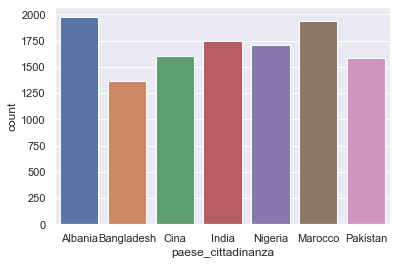

In [69]:
sns.countplot(data=permesso_sogg1, x='paese_cittadinanza', dodge=True)

#### Dalla tabella è possibile constatare come siano numerosi i Paesi dal quale provengano gli stranieri. Inoltre, i motivi riportati dall'ISTAT sono asilo, richiesta asilo e motivi umanitari, lavoro, famiglia, studio, residenza elettiva, religione e salute. Guardando la tabella ad occhio è possibile denotare come uno dei motivi principali sia la famiglia.

Per entrare nel merito visualizziamo graficamente la distribuzione secondo il motivo.

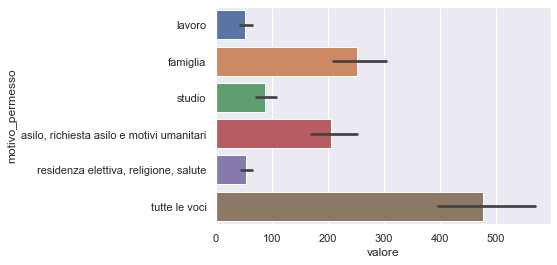

In [79]:
sns.set_style(style="darkgrid")
sns.color_palette("husl", 9)
sns.barplot(data=permesso_sogg, x='valore', y='motivo_permesso', orient='h')

#### I motivi principali sono appunto la famgilia e asilo, richiesta asilo e motivi umanitari. Nel primo caso rientrano le casistiche di soggetti aventi parenti nel nostro territorio; nel secondo caso rientrano persone provenienti da Paesi con probabili difficoltà politiche e di stabilità, ove i soggetti non godono di ampi diritti umani.

In questa analisi non spiccano le motivazioni di carattere economico, quindi migrazioni per il lavoro. Me ne occupo nel prossimo punto.

+ **PUNTO 3: OCCUPAZIONE E DISOCCUPAZIONE DEGLI STRANIERI IN ITALIA**

**CHE PERCENTUALE C'E' DI OCCUPAZIONE? E DI DISOCCUPAZIONE? IN CHE COSA SONO GENERALMENTE OCCUPATI?**

1)  **_OCCUPAZIONE_**: analizziamo i tassi di occupazione del 2019 (sono quelli proposti) della popolazione straniera in Italia con suddivsione nel territorio e secondo il titolo di studio.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [165]:
occupati = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/tasso_occup.csv", usecols=['Sesso', 'Territorio', 'Cittadinanza', 'Titolo di studio', 'Seleziona periodo', 'Value'])
occupati.isnull().any() #non ci sono valori nulli

Territorio           False
Sesso                False
Titolo di studio     False
Cittadinanza         False
Seleziona periodo    False
Value                False
dtype: bool

Rinominiamo le variabili per comodità.

In [166]:
occupati = occupati.rename(columns= {'Titolo di studio' : 'titolo_di_studio', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
occupati.head()

,Territorio,Sesso,titolo_di_studio,Cittadinanza,periodo,valore
0,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,2019,70.132598
1,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T1-2019,66.645359
2,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T2-2019,69.608896
3,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T4-2019,69.782218
4,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T3-2019,74.749894


Estrapoliamo dalla tabella solo i dati complessivi del 2019, attraverso l'indicizzazione secondo il periodo e una maschera.

In [167]:
occupati.set_index('periodo')
occupati_2019 = occupati.loc[(occupati['periodo']=='2019') & (occupati['Sesso']=='totale')]
occupati_2019.head()

,Territorio,Sesso,titolo_di_studio,Cittadinanza,periodo,valore
70,Italia,totale,"licenza di scuola elementare, nessun titolo di...",straniero-a,2019,55.341809
77,Italia,totale,licenza di scuola media,straniero-a,2019,57.311169
84,Italia,totale,diploma,straniero-a,2019,65.442083
91,Italia,totale,laurea e post-laurea,straniero-a,2019,67.419553
98,Italia,totale,totale,straniero-a,2019,60.995518


Raggruppando secondo il titolo di studio vediamo la percentuale media di occupazione degli stranieri in Italia.

In [62]:
occupati1 = occupati.groupby('titolo_di_studio')
occupati1.mean()

,valore
titolo_di_studio,
diploma,64.782263
laurea e post-laurea,66.532000
"licenza di scuola elementare, nessun titolo di studio",51.786082
licenza di scuola media,56.375118
totale,60.324838


#### Come possiamo notare dal risultato il tasso di occupazione è più alto per quei soggetti che hanno conseguito una laurea e/o un post-laurea pari al 66.53%, ma non di molto si discosta la percentuale di occupati dopo il diploma pari a 64.78%. Logicamente più bassa è la percentuale di coloro che non hanno nessun titolo di studio o hanno la licenza di scuola elementare, pari al 51.78%.

Visioniamo per capire meglio, il tasso di occupazione sulla base del proprio titolo di studio attraverso un grafico.

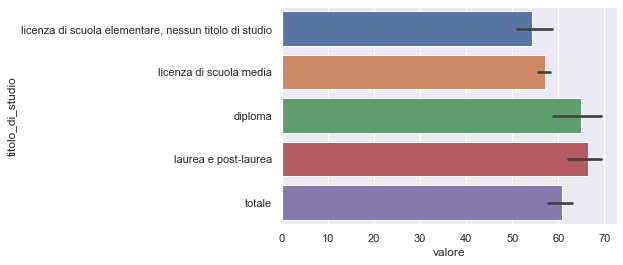

In [83]:
sns.barplot(data=occupati_2019, x='valore', y='titolo_di_studio', orient='h')

#### Nel complesso possiamo affermare che il tasso di occupazione è abbastanza alto tra la popolazione straniera (circa 6 persone su 10). Sicuramente si deve sottolineare il fatto che molti soggetti in difficoltà accettano anche lavori nell'economia sommersa, che quindi non compaiono in queste statistiche.

Sorge spontaneo però domandarsi quanti stranieri abbiano la possibilità di proseguire gli studi, sia in termini economici che di tempo. Analizziamo il numero di soggetti stranieri iscritti all'università.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [168]:
universita = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/stranieri_uni.csv", usecols=['AnnoA', 'AteneoNOME', 'CorsoTIPO', 'Continente', 'CittadinanzaNOME', 'Isc_S'])
universita.isnull().any() #non ci sono valori nulli

AnnoA               False
AteneoNOME          False
CorsoTIPO           False
Continente          False
CittadinanzaNOME    False
Isc_S               False
dtype: bool

Organizzo il dataframe con nomi di colonne più conformi e semplici.

In [169]:
universita = universita.rename(columns= {'AnnoA' : 'anno', 'AteneoNOME' : 'ateneo', 'CorsoTIPO' : 'tipo_corso', 'CittadinanzaNOME' : 'cittadinanza', 'Isc_S': 'valore'})
universita.head()

,anno,ateneo,tipo_corso,Continente,cittadinanza,valore
0,2018/2019,Torino,Laurea,EUROPA-UE,Romania,983
1,2018/2019,Roma La Sapienza,Laurea,EUROPA-UE,Romania,945
2,2018/2019,Milano Politecnico,Laurea Magistrale,ASIA,Cina,916
3,2018/2019,Milano Politecnico,Laurea Magistrale,ASIA,India,771
4,2018/2019,Milano Politecnico,Laurea Magistrale,ASIA,Iran,717


Raggruppo la tabella secondo il tipo di corso e visualizzo il risultato.

In [170]:
universita1 = universita.groupby('tipo_corso')
universita1.sum()

,valore
tipo_corso,
Laurea,40030
Laurea Magistrale,20994
Laurea Magistrale Ciclo Unico,6904
Vecchio Ordinamento,31


#### I numeri a livello nazionale non sono altissimi, ma nemmeno non significativi. In Italia l'università è per molte persone un investimento troppo elevato economicamente, quindi in primis le persone straniere potrebbero incontrare questo grande ostacolo. Ritornando alle percentuali di occupazione, si verifica il c.d. effetto selezione per cui gli stranieri che riescono a superare l'ostacolo hanno garantito un buon livello occupazionale.

2) **_DISOCCUPAZIONE_**: visioniamo i tassi di disocupazione analogamente al punto precedente.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [171]:
disoccupati = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/tasso_disoccup.csv", usecols=['Sesso', 'Titolo di studio', 'Cittadinanza', 'Seleziona periodo', 'Value'])
disoccupati.isnull().any() #non ci sono valori nulli

Sesso                False
Titolo di studio     False
Cittadinanza         False
Seleziona periodo    False
Value                False
dtype: bool

Proseguiamo con l'analisi dei tassi e per prima cosa modifichiamo il nome delle variabili.

In [172]:
disoccupati = disoccupati.rename(columns= {'Titolo di studio' : 'titolo_di_studio', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
disoccupati.head()

,Sesso,titolo_di_studio,Cittadinanza,periodo,valore
0,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,2019,14.237611
1,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T1-2019,17.925378
2,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T2-2019,14.756560
3,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T4-2019,14.365419
4,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T3-2019,9.799707


Raggruppiamo i dati per il titolo di studio e visualizziamo la percentuale media di disoccupati.

In [204]:
disoccupati1= disoccupati.groupby('titolo_di_studio')
disoccupati1.mean()

,valore
titolo_di_studio,
diploma,13.514178
laurea e post-laurea,10.438963
"licenza di scuola elementare, nessun titolo di studio",15.602786
licenza di scuola media,13.555965
totale,13.384252


#### I tassi di disoccupazione sono generalmente molto bassi, il 10% per i laureati ed il 15% anche per i soggetti senza titolo di studio o con la licenza di scuola elementare sono disoccupati. Da questi risultati si può desumere il fatto che gli stranieri nel nostro Paese facciano parte della forza lavoro e che una piccola parte di essi non lavorano. Anche per questi dati si può riflettere sul fatto che parte dei soggetti risultati disoccupati possano fare parte dell'economia sommersa.

Anche in questo caso analizziamo i tassi in base al titolo di studio conseguito graficamente.

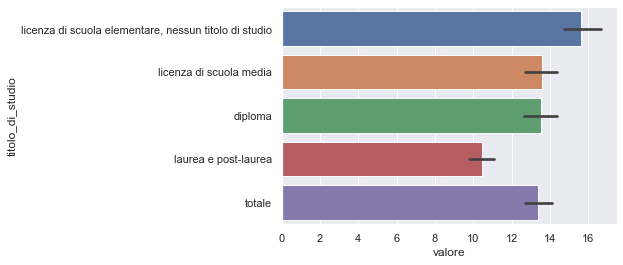

In [24]:
sns.barplot(data=disoccupati, x='valore', y='titolo_di_studio', orient='h')

Non ci siamo però occupati della tipologia di attività che quest'ultimi svolgono, molto utili ai fini dell'analisi.

3) **_TIPOLOGIA DI ATTIVITA' SVOLTA_**: analizziamo che attività svolgono gli stranieri in Italia.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [174]:
tipo_occup = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/occupaz_str.csv", usecols=['Territorio', 'Sesso', 'Professione 2011', 'Seleziona periodo', 'Value'])
tipo_occup.isnull().any() #non ci sono valori nulli

Territorio           False
Sesso                False
Professione 2011     False
Seleziona periodo    False
Value                False
dtype: bool

Rinominiamo per semplicità le variabili.

In [176]:
tipo_occup = tipo_occup.rename(columns={'Professione 2011' : 'Professione', 'Seleziona periodo': 'periodo', 'Value' : 'valore'})
tipo_occup.head()

,Territorio,Sesso,Professione,periodo,valore
0,Italia,maschi,qualificate e tecniche,2019,92.588
1,Italia,maschi,qualificate e tecniche,T1-2019,83.485
2,Italia,maschi,qualificate e tecniche,T2-2019,84.787
3,Italia,maschi,qualificate e tecniche,T4-2019,101.517
4,Italia,maschi,qualificate e tecniche,T3-2019,100.564


Sarebbe interessante andare a vedere come le diverse professioni si distribuiscono sul territorio italiano.

In [177]:
tipo_occup1 = tipo_occup.pivot_table(values='valore', index='Territorio', columns='Professione')
tipo_occup1

Professione,impiegati e addetti al commercio e servizi,operari e artigiani,personale non qualificato,qualificate e tecniche,totale
Territorio,,,,,
Centro,131.381333,122.874000,149.838667,33.454000,429.226095
Italia,466.276095,504.135286,539.900810,125.793667,1636.105810
Mezzogiorno,74.169333,49.988667,122.121333,9.185667,245.488333
Nord,280.674667,333.012000,279.947333,83.477333,961.391429
Nord-est,128.071000,151.655333,103.751000,29.156667,410.468619
Nord-ovest,152.603333,181.357000,176.196000,54.320667,550.923000


#### Come si denota dai dati, la maggior parte della forza lavoro straniera si concentra al Nord e nel Centro, dove le opportunità di lavoro appaiono maggiori. La distribuzione delle professioni invece sottolinea come la maggioranza di questi soggetti sia personale non qualificato, svolga l'operaio o l'artigiano o si occupi di servizi e commercio. Una bassisima percentuale è invece personale altamente qualificato, per le ragioni che abbiamo analizzato prima.

Visualizziamo questi dati graficamente con un grafico a torta.

In [178]:
tipo_occup2 = pd.DataFrame(tipo_occup, columns={'Professione', 'valore'})
tipo_occup3 = tipo_occup2.groupby('Professione').sum()
tipo_occup3

,valore
Professione,
impiegati e addetti al commercio e servizi,12092.497
operari e artigiani,13103.502
personale non qualificato,13833.480
qualificate e tecniche,3270.450
totale,88905.669


In [179]:
percentuale = (tipo_occup3['valore']/42299.929)*100
percentuale

Professione
impiegati e addetti al commercio e servizi     28.587511
operari e artigiani                            30.977598
personale non qualificato                      32.703317
qualificate e tecniche                          7.731573
totale                                        210.179239
Name: valore, dtype: float64

<ipython-input-120-643665adf74f>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.pie(tipo_occup3, labels = langs,autopct='%1.2f%%')


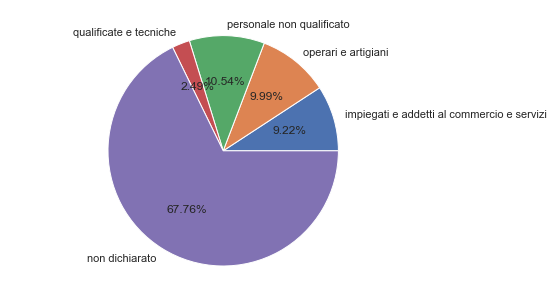

In [120]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['impiegati e addetti al commercio e servizi', 'operari e artigiani', 'personale non qualificato', 'qualificate e tecniche', 'non dichiarato']
ax.pie(tipo_occup3, labels = langs,autopct='%1.2f%%')
plt.show()

Il fenomeno sociale porta quindi a delle conseguenze, sia positive che negative. Analizziamole.

+ **PUNTO 4: POSSIBILI ASPETTI NEGATIVI?**

La **DELINQUENZA** può essere considerata come uno dei principali aspetti negativi; questo avviene per il pensiero comune secondo cui gli stranieri, non trovando lavoro, sono costretti a delinquere per sopravvivere. (Ma non è così). Prendo in considerazione gli stranieri che hanno commesso delitti e/o delinquenze sul territorio italiano.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [180]:
delinquenza = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/delinquenza.csv", usecols=['TIPO_DATO35', 'Tipo di delitto', 'Cittadinanza', 'Seleziona periodo', 'Value'])
delinquenza.isnull().any() #non ci sono valori nulli

TIPO_DATO35          False
Tipo di delitto      False
Cittadinanza         False
Seleziona periodo    False
Value                False
dtype: bool

Rinomino per semplicità le colonne e seleziono le righe contenenti i dati delle persone che hanno commesso violenze, delitti o delinquenze.

In [181]:
delinquenza = delinquenza.rename(columns={'TIPO_DATO35' : 'posizione_sogg', 'Tipo di delitto': 'tipo_delitto', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
delinquenza = delinquenza.loc[delinquenza['posizione_sogg'] == 'OFFEND']
delinquenza.head()

,posizione_sogg,tipo_delitto,Cittadinanza,periodo,valore
0,OFFEND,strage,straniero-a,2018,2
1,OFFEND,strage,straniero-a,2018,0
2,OFFEND,omicidi volontari consumati,straniero-a,2018,46
4,OFFEND,omicidi volontari consumati,straniero-a,2018,4
6,OFFEND,omicidi volontari consumati a scopo di furto o...,straniero-a,2018,4


Che tipologie di azioni commettono?

In [182]:
delinquenza1 = delinquenza.pivot_table(values='valore', index='posizione_sogg', columns='tipo_delitto')
delinquenza1

tipo_delitto,altri delitti,associazione di tipo mafioso,associazione per delinquere,attentati,atti sessuali con minorenne,contrabbando,contraffazione di marchi e prodotti industriali,corruzione di minorenne,danneggiamenti,danneggiamento seguito da incendio,...,sequestri di persona,sfruttamento e favoreggiamento della prostituzione,stalking,strage,tentati omicidi,totale,truffe e frodi informatiche,usura,violazione della proprietà intellettuale,violenze sessuali
posizione_sogg,,,,,,,,,,,,,,,,,,,,,
OFFEND,6914.1875,8.375,122.625,3.0,9.6875,4.4375,230.0625,1.6875,481.625,17.875,...,38.875,88.25,144.625,0.4375,37.6875,17438.625,624.6875,4.4375,12.1875,125.5625


#### Gli illeciti compiuti dagli stranieri in Italia sono di vario tipo, vanno dall'associazione per deliquere allo stalking. Uno dei dati maggiori e più rilevanti è a proposito delle truffe e frodi informatiche.

Sono in numero significativo?

In [183]:
delinquenza['valore'].count()

896

Sul totale dei residenti 2018, in che percentuale sono?

In [184]:
(delinquenza['valore'].count()/residenti_2018['valore'])*100

9658    0.017049
Name: valore, dtype: float64

#### Tuttavia, il numero di illeciti compiuti nell'anno analizzato (è proposto il 2018) sono minori di 1000, sono un numero non statisticamente significativo a mio parere. Inoltre, in proporzione ai residenti del 2018 sono solo il 0.017%

+ **PUNTO 5: POSSIBILI ASPETTI POSITIVI?**

L'**ALTA FECONDITA'** è uno dei possibili e condivisi aspetti positivi che l'immigrazione in Italia consente. Analizziamo i tassi totali di fecondità delle donne straniere.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [185]:
fecondita = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/fecondita.csv", usecols=['Territorio', 'Tipo dato', 'Cittadinanza', 'Seleziona periodo', 'Value'])
fecondita.isnull().any() #non ci sono valori nulli

Territorio           False
Tipo dato            False
Cittadinanza         False
Seleziona periodo    False
Value                False
dtype: bool

Rinominiamo le variabili e selezioniamo il tasso di fecondita totale, escludendo casistiche più specifiche per comodità e maggiore chiarezza.

In [186]:
fecondita = fecondita.rename(columns={'Tipo dato' : 'tipo_dato', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
fecondita = fecondita.loc[fecondita['tipo_dato']== 'tasso di fecondità totale']
fecondita 

,Territorio,tipo_dato,Cittadinanza,periodo,valore
0,Italia,tasso di fecondità totale,straniero-a,2018,1.94
2,Nord-ovest,tasso di fecondità totale,straniero-a,2018,2.03
4,Piemonte,tasso di fecondità totale,straniero-a,2018,1.94
6,Torino,tasso di fecondità totale,straniero-a,2018,1.84
8,Vercelli,tasso di fecondità totale,straniero-a,2018,2.11
...,...,...,...,...,...
254,Cagliari,tasso di fecondità totale,straniero-a,2018,1.44
256,Oristano,tasso di fecondità totale,straniero-a,2018,1.43
258,Monza e della Brianza,tasso di fecondità totale,straniero-a,2018,2.21
260,Fermo,tasso di fecondità totale,straniero-a,2018,1.89


Visualizziamo in modo più chiaro per ogni città qual è il tasso di fecondità delle donne straniere (in media).

In [187]:
fecondita.pivot_table(values='valore', index='tipo_dato', columns='Cittadinanza')

Cittadinanza,straniero-a
tipo_dato,
tasso di fecondità totale,1.924773


#### Il tasso di fecondità medio delle donne straniere in Italia è pari a 1.93 figli per donna quindi quasi due figli per donna. Citando sempre l'ISTAT il tasso di fecondità italiano invece ammonta a 1.29 figli per donna, uno dei valori più bassi di tutta Europa. Come sappiamo, il problema dell'invecchiamento demografico riguarda soprattutto anche l'Italia e l'inalzamento di questo tasso potrebbe contrastare questo fenomeno.

+ **PUNTO 6: IN CHE CONDIZIONI VIVONO I MIGRANTI IN ITALIA?**

1) Si parla spesso di **DISCRIMINAZIONI** dei quali i soggetti oggetto di questa analisi sono spesso succubi. Analizziamo le tipologie di discriminazioni subite e in che contesto avvengono.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [136]:
discriminazioni = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/discriminazioni.csv", usecols=['Cittadinanza', 'Discriminazione', 'Value'])
discriminazioni.isnull().any() #non ci sono valori nulli

Cittadinanza       False
Discriminazione    False
Value              False
dtype: bool

Rinominanimo le variabili.

In [137]:
discriminazioni = discriminazioni.rename(columns={'Value' : 'valore'})
discriminazioni.head()

,Cittadinanza,Discriminazione,valore
0,Albania,"sì, nel percorso di studi",7476.0
1,Albania,"sì, sul lavoro",28940.0
2,Albania,"sì, nella ricerca del lavoro",19327.0
3,Albania,"sì, in locali/uffici pubblici",8570.0
4,Unione europea (27 paesi),"sì, nel percorso di studi",15704.0


Raggruppiamo secondo il Paese di cittadinanza e facciamo la somma dei valori. Quanti stranieri hanno subito discriminazioni?

In [138]:
discriminazioni1 = discriminazioni.groupby('Cittadinanza')
discriminazioni1.sum()

,valore
Cittadinanza,
Albania,64347.0
Extra Ue 27,689181.3
Marocco,100362.4
Paesi esteri,1001145.1
Romania,238045.8
Unione europea (27 paesi),312010.4


Appare evidente dalla tabella precedente l'ingente numero di persone vittime di discriminazioni. Ma in che contesti avvengono?

In [139]:
discriminazioni2 = discriminazioni.groupby('Discriminazione')
discriminazioni2.sum()

,valore
Discriminazione,
"sì, in locali/uffici pubblici",594658.1
"sì, nel percorso di studi",154006.5
"sì, nella ricerca del lavoro",631805.4
"sì, sul lavoro",1024622.0


#### Le discriminazioni subite si riportano spesso sul posto di lavoro (1024622) e nella ricerca di quest'utltimo (631805.4). Non mancano discriminazioni a scuola, durante il percorso degli studi (154006.5) e nei locali e uffici pubblici (594658). Questi sono solo alcuni esempi semplificativi di situazioni che avvengono tutti i giorni vicino a noi.

Vediamo le tipologie di discriminazioni dove sono state incontrate graficamente.

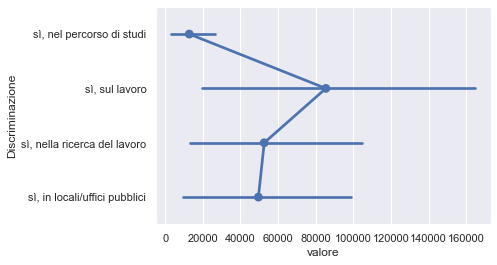

In [161]:
sns.pointplot(data=discriminazioni, x='valore', y='Discriminazione')

2) Molte persone venute in ricerca di felicità e stabilità si trovano però in condizioni di **POVERTA'**. Analizziamo il dataframe relativo alle famiglie in condizioni di povertà assoluta. Per povertà assoluta intendiamo quelle famiglie che stentano a sopravvivere ed a mantenere uno standard di vita minimamente accettabile.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [210]:
poverta = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/poverta.csv", usecols=['Territorio', 'TIPO_DATO8', 'Seleziona periodo', 'Value'])
poverta.isnull().any() #non ci sono valori nulli

Territorio           False
TIPO_DATO8           False
Seleziona periodo    False
Value                False
dtype: bool

Rinominiamo le variabili e selezioniamo le righe contenenti il dato di famiglie in povertà assoluta.

In [211]:
poverta = poverta.rename(columns={'TIPO_DATO8' : 'tipo_dato', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
poverta = poverta.loc[poverta['tipo_dato']== 'FAM_POVASS']
poverta

,Territorio,tipo_dato,periodo,valore
0,Italia,FAM_POVASS,2019,100.0
10,Nord,FAM_POVASS,2019,43.4
20,Nord-ovest,FAM_POVASS,2019,25.1
30,Nord-est,FAM_POVASS,2019,18.3
40,Centro,FAM_POVASS,2019,14.4
50,Mezzogiorno,FAM_POVASS,2019,42.2
60,Sud,FAM_POVASS,2019,28.1
70,Isole,FAM_POVASS,2019,14.1


Mediamente qual è il tasso di povertà assoluta familiare?

In [212]:
np.mean(poverta['valore'])

35.70000000000001

#### Il tasso di povertà assoluta familiare, nelle famiglie con persone straniere, è pari al 35.7%, ossia circa 4 persone su 10. Il numero non è molto alto ma è comunque significativo e questi soggetti, i più fragili, andrebbero più tutelati dallo Stato.

> ## REPORT
***

+ In Italia il **flusso di migrazioni** è in aumento negli ultimi anni, lo dimostrano i recenti dati ISTAT. I numeri sono in aumento costante, ma non in modo molto significativo, come dimostra il grafico, si passa da 5144440 del 2017 a 5306548 del 2019.

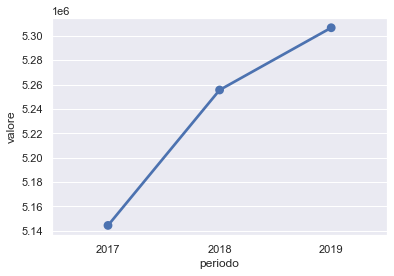

In [188]:
sns.pointplot(data=residenti, x='periodo', y='valore')

In [199]:
(5306548-5144440)/5144440

0.03151130152164278

**SI REGISTRA QUINDI UN AUMENTO DEL 3.15 %**

+ Sono numerosi i **Paesi** dai quali i migranti arrivano. I più significativi sono quelli riportati nel seguente grafico: *Albania, Bangladesh, Cina, India, Nigeria, Marocco e Pakistan*. Il Paese con il maggior numero di migranti è l'Albania.

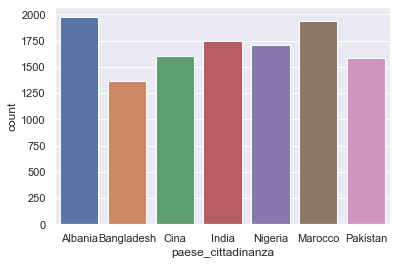

In [189]:
sns.countplot(data=permesso_sogg1, x='paese_cittadinanza', dodge=True)

+ I **motivi** per i quali i migranti si recano nel nostro Paese sono numerosi, vengono ricondotti però a le seguenti ragioni: lavoro, famiglia, studio, asilo, richiesta di asilo e motivi umanitari, residenza elettiva, religione e salute. Il moptivo che sembra più rilevante è la famiglia, seguito dall'asilo, richiesta di asilo e per motivi umanitari. Ciò si verifica in quanto nei Paesi prima elencati i diritti umani e le condizioni socio-economiche non sono delle migliori.

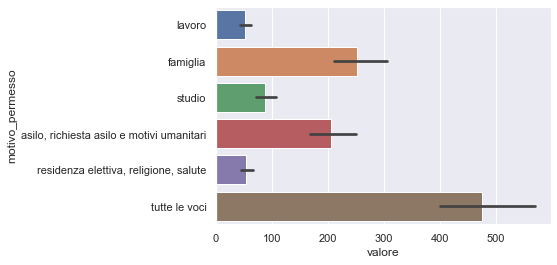

In [200]:
sns.set_style(style="darkgrid")
sns.color_palette("husl", 9)
sns.barplot(data=permesso_sogg, x='valore', y='motivo_permesso', orient='h')

+ **I tassi di occupazione** delle persone migrate in Italia sono nel complesso significativi: di media il 66.53% dei laureati è occupato; la percentuale di occupati dopo il diploma è pari al 64.78%. Risulta più bassa è la percentuale di coloro che non hanno nessun titolo di studio o hanno la licenza di scuola elementare, pari al 51.78%.

In [202]:
occupati1 = occupati.groupby('titolo_di_studio')
occupati1.mean()

,valore
titolo_di_studio,
diploma,64.782263
laurea e post-laurea,66.532000
"licenza di scuola elementare, nessun titolo di studio",51.786082
licenza di scuola media,56.375118
totale,60.324838


+ Inoltre, è utile sottolineare che le persone emigrate che riescono a seguire un **percorso di studi** oltre a quello previsto obbligatoriamente, è un numero molto esiguo. Il problema sta nel c.d. effetto selezione che non consente a coloro che hanno problemi economici ad iscriversi all'università.

In [203]:
universita1 = universita.groupby('tipo_corso')
universita1.sum()

,valore
tipo_corso,
Laurea,40030
Laurea Magistrale,20994
Laurea Magistrale Ciclo Unico,6904
Vecchio Ordinamento,31


+ **Il tasso di disoccupazione** delle persone migrate in Italia sono nel complesso abbastanza bassi: i laureati sono solo al 10% disoccupati, se con il diploma il 13%. Le persone senza un titolo di studio pari al 15%, percentuale logicamente più alta.

In [205]:
disoccupati1= disoccupati.groupby('titolo_di_studio')
disoccupati1.mean()

,valore
titolo_di_studio,
diploma,13.514178
laurea e post-laurea,10.438963
"licenza di scuola elementare, nessun titolo di studio",15.602786
licenza di scuola media,13.555965
totale,13.384252


+ **Le tipologie di professioni** che gli stranieri svolgono in Italia sono, proprio come è creduto nel pensiero comune, le attività che gli italiano non svolgerebbero. Questo non avviene per una sorta di classificazione tra le professioni, bensì, secondo la teoria del capitale umano, il lavoro rappresenta il risultato dell'investimento scolastico dei soggetti. Come possiamo notare dal grafico a torta, la maggior parte delle persone sono occupate in professioni non qualificate oppure nella classe operaia/artigiana. Solo il 2.5% svolge attività qualificate e tecniche.

<ipython-input-193-643665adf74f>:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax.pie(tipo_occup3, labels = langs,autopct='%1.2f%%')


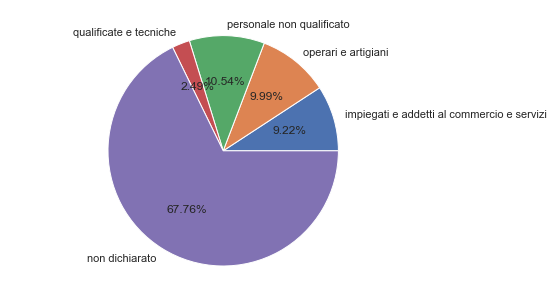

In [193]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['impiegati e addetti al commercio e servizi', 'operari e artigiani', 'personale non qualificato', 'qualificate e tecniche', 'non dichiarato']
ax.pie(tipo_occup3, labels = langs,autopct='%1.2f%%')
plt.show()

+ Il possibile aspetto negativo è la **delinquenza**. Analizzando però i dati, la percentuale di illeciti compiuti dalla popolazione migrante in Italia (sul totale dei residenti) è veramente bassa, quasi inesistente.

In [206]:
(delinquenza['valore'].count()/residenti_2018['valore'])*100

9658    0.017049
Name: valore, dtype: float64

**LA PERCENTUALE DI MIGRANTI CHE NEL 2018 HANNO COMPIUTO ATTI ILLECITI E' PARI ALLO 0.017%**

+ Il possibile aspetto positivo è la **fecondità**. Analizzando i dati emerge come il tasso di fecondità sia decisamente superiore nelle donne emigrate in Italia, rispetto alle autoctone. Il problema è legato a problemi di tipo culturale ed economici. 

In [207]:
fecondita.pivot_table(values='valore', index='tipo_dato', columns='Cittadinanza')

Cittadinanza,straniero-a
tipo_dato,
tasso di fecondità totale,1.924773


**IL TASSO DI FECONDITA' IN MEDIA E' PARI A 1.92 FIGLI PER DONNA (CONTRO AL 1.29 ITALIANO).**

+ Le **condizioni** nelle quali vivono i migranti in Italia non sono delle migliori: sono vittime in tanti casi di discriminazioni e vivono spesso in condizioni di ingenza diffusa. Il grafico riporta i luoghi nei quali i migranti sono state vittime di discriminazioni: perlopiù ciò avviene sul posto di lavoro e nella ricerca di quest'ultimo, ma anche in luoghi e uffici pubblici. 

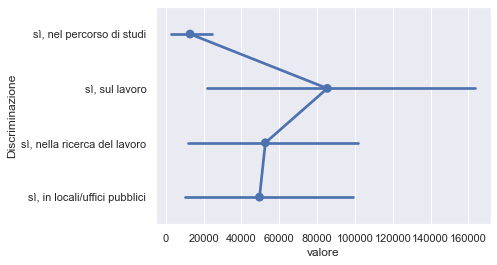

In [208]:
sns.pointplot(data=discriminazioni, x='valore', y='Discriminazione')

In [213]:
np.mean(poverta['valore'])

35.70000000000001

**LA PERCENTUALE DI PERSONE IN CONDIZIONI DI INDIGENZA E' IL 35.7%**

+ **CONCLUSIONI FINALI**
* * *

Come ho spiegato inizialmente l'obbiettivo della analisi è evidenziare la presenza della migrazione nel nostro Paese mettendo in luce i *numeri*, i *motivi* e le *conseguenze* che possono derivarne.

Ogni anno si contano più o meno di **5 milioni** di migranti provenienti da tutto il mondo, un trend in aumento ma perlopiù stabile tra un anno e l'altro. I **motivi** per i quali questi soggetti migrano sono di tipo familiare, lavorativo o per richiedere asilo e protezione umanitaria. I migranti sono parte integrante della forza lavoro italiana: parliamo di più del **60% occupato**, non contando l'ingente numero di persone impiegate nell'economia sommersa. Pochi invece sono i disoccupati, pari al 10-15% del totale. Essi svolgono, proprio come è comunemente condiviso, quei lavori che gli italiani spesso *non sarebbero disposti a svolgere*; è un meccanismo che non ha a che fare con nessuna "classificazione" lavorativa, piuttosto ha a che vedere con la teoria del capitale umano, secondo cui un soggetto che ha investito in istruzione si aspetta un ritorno di quest'ultimo in termini lavorativi. Sono occupati quindi in lavori non qualificati, fanno parte della classe operaia o dell'artigianato e molto poco spesso in attività prestigiose e qualificate. Come tutte le cose, anche la migrazione porta con sé pro e contro: tra i contro troviamo la **delinquenza**, che secondo alcuni potrebbero esercitare, ma che molti dati smentiscono (o perlomeno non sono così rilevanti statisticamente); tra i pro troviamo **l'alta fecondità**, pari a quasi 2 figli per donna, che contrasterebbe l'invecchiamento della popolazione italiana. Riguardo la loro inclusione nel Paese che li ospita, molte sono le perplessità in questo campo. Sono spesso vittime di **discriminazioni** nel mondo del lavoro e non solo, anche a scuola e nei luoghi pubblici. Inoltre, una parte di loro si trova in **gravi condizioni economiche**. 

L'inclusione e l'integrazione sono temi importanti e sempre più attuali, sta ad ognuno di noi vedere questo fenomeno come qualcosa che non può essere fermato o contrastato, bensì sfruttato al meglio e interpretato come un continuo arricchimento.